# Exercise 1

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import sys
import os
sys.path.append(os.path.abspath("../../AchimBrinkop/Neuro-Analysis/01-local_field_potential/code"))
sys.path.append(os.path.abspath("../../AchimBrinkop/Neuro-Analysis/01-local_field_potential/data"))
from utils import download_data
import lfp_functions as lf
from scipy.fft import fft, fftfreq
from scipy.signal import butter
from scipy.signal import sosfilt
from time import process_time

sns.set_theme(context='notebook',style='white',font_scale=1.5,
              rc = {'axes.spines.top':False,'axes.spines.right':False,
                     'image.cmap':plt.cm.jet})
download_data('https://surfdrive.surf.nl/files/index.php/s/7BosHgemAseANIc')

In [2]:
with open('data/moving_lfp.pickle', 'rb') as handle:
    lfp_data = pickle.load(handle)

lfp = lfp_data['lfp']
sampling_rate = lfp_data['sampling_rate']

(0.0, 100.0)

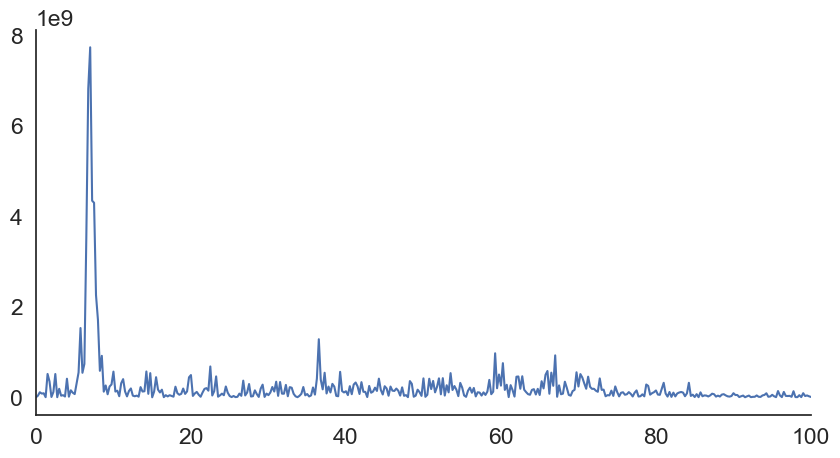

In [3]:
lfp_short = lfp[:4000] # equals 2 seconds of recordings

n_samples =  len(lfp_short)
sample_dt = 1. / sampling_rate

# we subtract the mean to get rid of the 0 frequency component in the spectrum
centered_lfp = lfp_short - np.mean(lfp_short)

transformed_signal = fft(centered_lfp) 

frequencies = fftfreq(n_samples,sample_dt) 

transformed_signal = transformed_signal[:n_samples//2]
frequencies = frequencies[:n_samples//2]

power = abs(transformed_signal)**2

plt.figure(figsize = (10,5))
plt.plot(frequencies,power)
plt.xlim([0,100]) # restrict to 
#plt.axvline(x=8 ,c='r',linestyle='--',label='8 Hz theta')
#plt.axvline(x=50 ,c='grey',linestyle='--',label='50 Hz electrical noise')

#plt.legend()

### Fixed central frequency, different width

I took the first 2 seconds of the signal, and plotted the fast gamma signals. I kept the central frequency fixed at 120 Hz, but increased the bandwidth with 40 hz each time. You see that in the first plot there are areas with clear peaks, while in the last plot it just looks like noise. 

0.00410099999999991
0.0012660000000002114
0.0013860000000001094


Text(0.5, 1.0, 'Filter between 60-180 Hz')

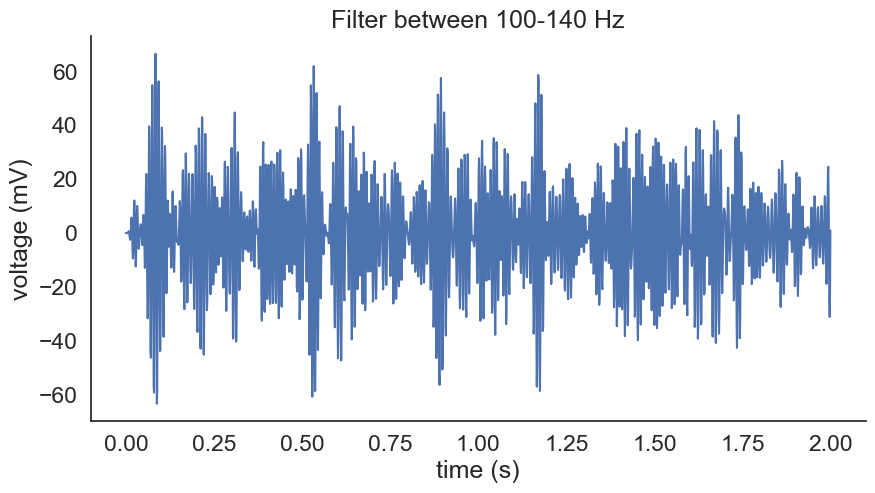

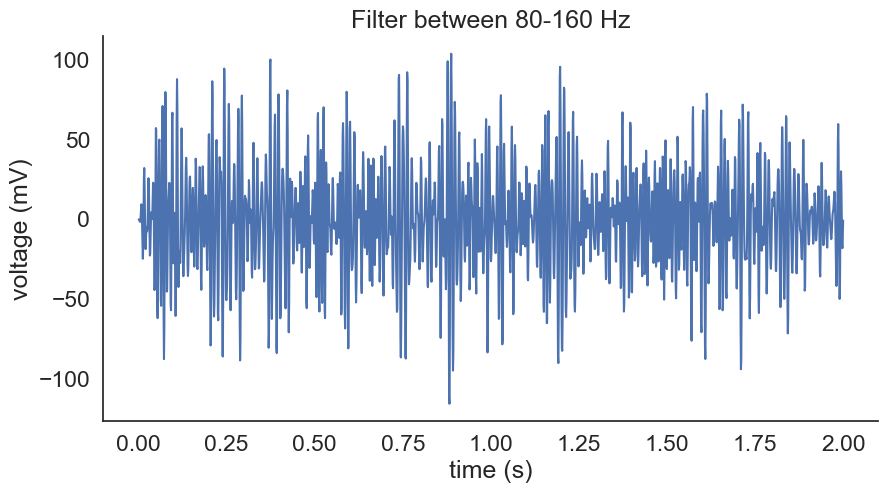

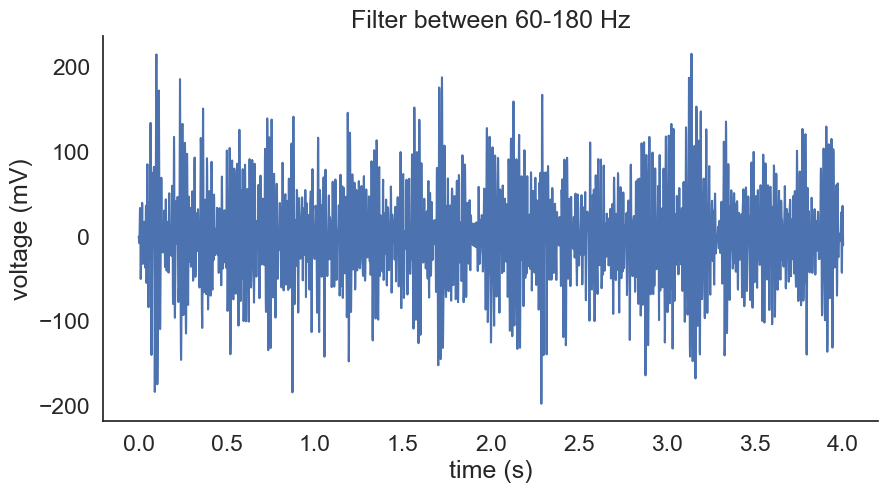

In [4]:
filter_order = 5 #the higher the order, the sharper the filter frequency response,               
                 #but with more computations and potental numerical instability
low_f = 100
high_f = 140

#define filter object
t_start = process_time()
filter = butter(filter_order,[low_f,high_f],
                btype='band', 
                output='sos', 
                fs=sampling_rate)
t_stop = process_time()
print(t_stop-t_start)
#apply filter to lfp       
wideband_lfp = sosfilt(filter, lfp)
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,2,2000),wideband_lfp[:2000],label = 'wideband filtered')
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('Filter between 100-140 Hz')

low_f = 80
high_f = 160

#define filter object
t_start = process_time()
filter = butter(filter_order,[low_f,high_f],
                btype='band', 
                output='sos', 
                fs=sampling_rate)
t_stop = process_time()
print(t_stop-t_start)
#apply filter to lfp       
wideband_lfp = sosfilt(filter, lfp_short)
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,2,2000),wideband_lfp[:2000],label = 'wideband filtered')
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('Filter between 80-160 Hz')

low_f = 60
high_f = 180

#define filter object
t_start = process_time()
filter = butter(filter_order,[low_f,high_f],
                btype='band', 
                output='sos', 
                fs=sampling_rate)
t_stop = process_time()
print(t_stop-t_start)  
#apply filter to lfp       
wideband_lfp = sosfilt(filter, lfp_short)
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,4,4000),wideband_lfp,label = 'wideband filtered')
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('Filter between 60-180 Hz')


### Change central frequency

Here I changed the value of the central frequency but kept the bandwith fixed with 40 Hz. I decreased the central frequency with 20 Hz each time. You see that the signal does not become noisy, such that there is always some pattern visable. However, the signal looks thinner, which is what you expect sinds you are decreasing the central frequency (towards slow gamma frequency range). 

### FPB Comments
Code looks OK, plots well formatted, filter order analysis is missing Grade: 7.5

0.004461000000000048
0.001422999999999952
0.0013159999999996508


Text(0.5, 1.0, 'Filter between 40-80 Hz')

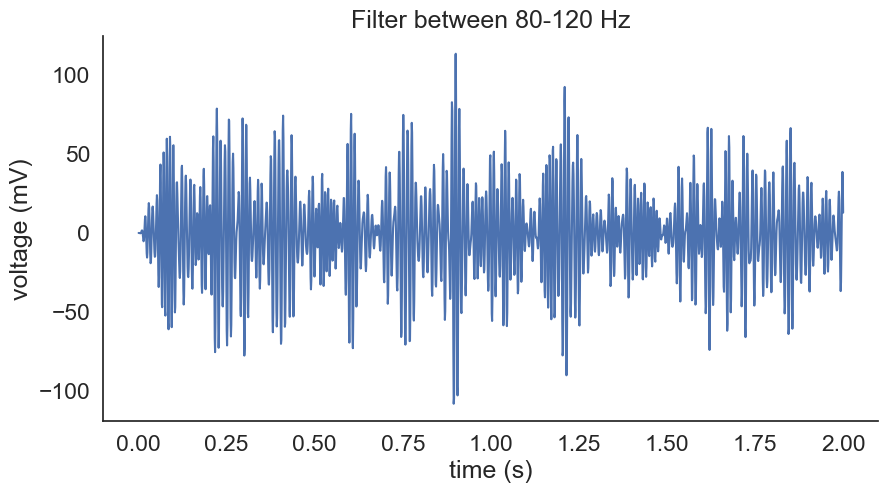

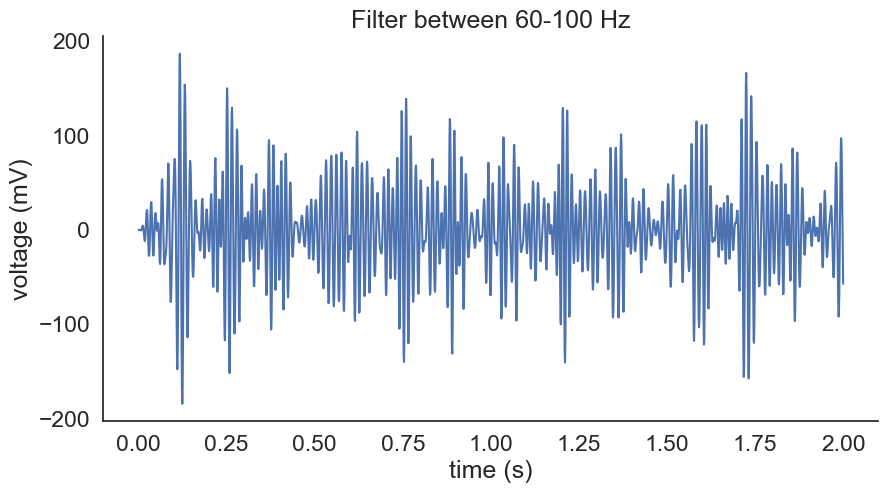

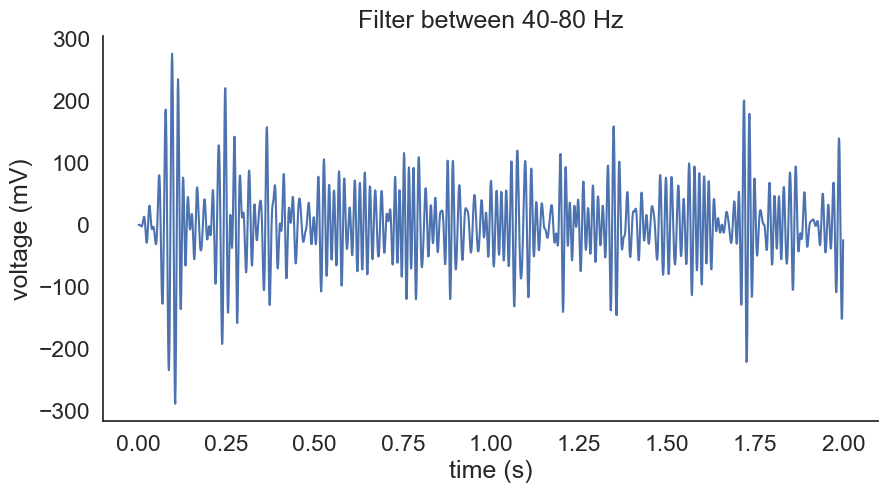

In [5]:
low_f = 80
high_f = 120

#define filter object
t_start = process_time()
filter = butter(filter_order,[low_f,high_f],
                btype='band', 
                output='sos', 
                fs=sampling_rate)
t_stop = process_time()
print(t_stop-t_start) 
#apply filter to lfp       
wideband_lfp = sosfilt(filter, lfp)
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,2,2000),wideband_lfp[:2000],label = 'wideband filtered')
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('Filter between 80-120 Hz')

low_f = 60
high_f = 100

#define filter object
t_start = process_time()
filter = butter(filter_order,[low_f,high_f],
                btype='band', 
                output='sos', 
                fs=sampling_rate)
t_stop = process_time()
print(t_stop-t_start)
#apply filter to lfp       
wideband_lfp = sosfilt(filter, lfp)
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,2,2000),wideband_lfp[:2000],label = 'wideband filtered')
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('Filter between 60-100 Hz')

low_f = 40
high_f = 80

#define filter object
t_start = process_time()
filter = butter(filter_order,[low_f,high_f],
                btype='band', 
                output='sos', 
                fs=sampling_rate)
t_stop = process_time()
print(t_stop-t_start)
#apply filter to lfp       
wideband_lfp = sosfilt(filter, lfp)
plt.figure(figsize=(10,5))
plt.plot(np.linspace(0,2,2000),wideband_lfp[:2000],label = 'wideband filtered')
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('Filter between 40-80 Hz')

# Exercise 2

In [6]:
from scipy import signal
from pywt import scale2frequency
from pywt import cwt

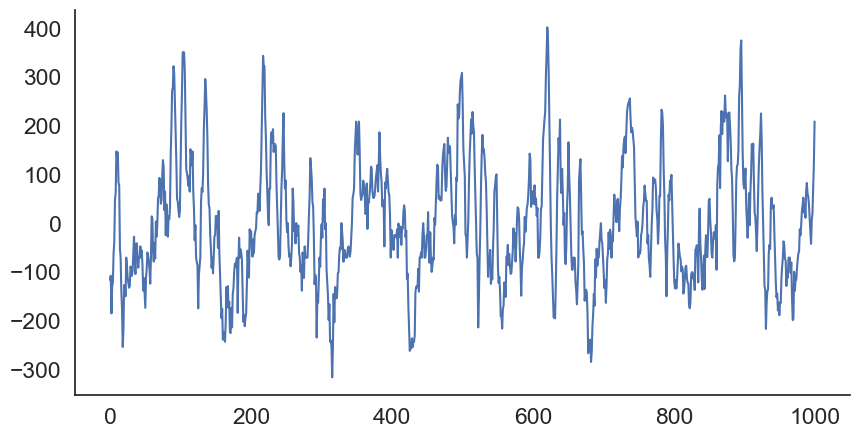

In [7]:
start = 5 #in seconds
end = 6 # in seconds

sig = lfp[int(start*sampling_rate):int(end*sampling_rate)]
sig = sig - np.mean(sig) # get rid of 0 frequency component

plt.figure(figsize=(10,5))
plt.plot(sig)

#spectrogram with morlet transform

frequencies =  np.linspace(0.1,20,100)/sampling_rate
wavelet = 'cmor1.0-1.0'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)

Text(0.5, 1.0, 'mexh wavelet')

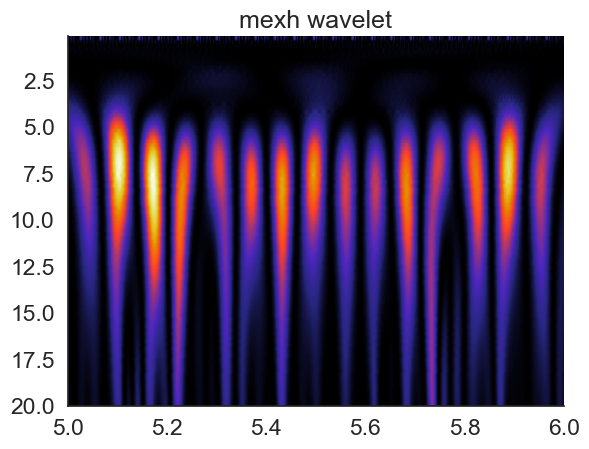

In [8]:
wavelet = 'mexh'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
#plt.figure(figsize=(10,5))
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')
plt.title('mexh wavelet')

Text(0.5, 1.0, 'gaus wavelet')

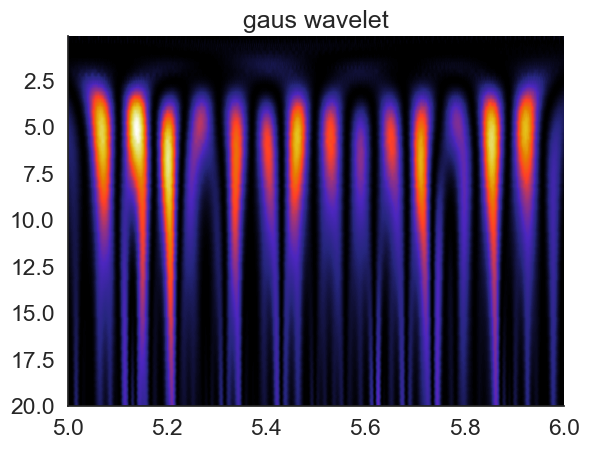

In [11]:
wavelet='gaus1'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')
plt.title('gaus wavelet')

### FPB Comments
Wavelet is called 'gaus1'

Text(0.5, 1.0, 'morl wavelet')

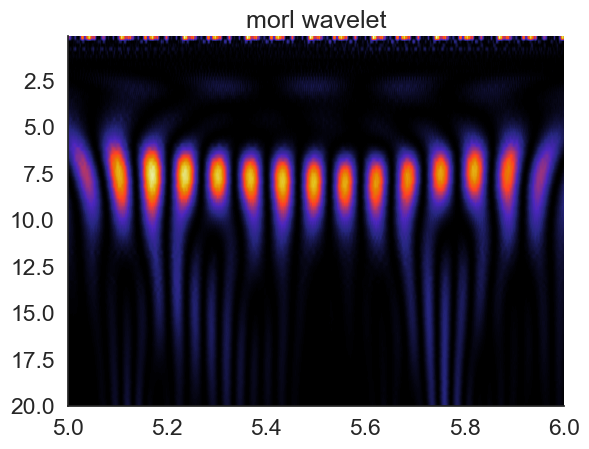

In [12]:
wavelet='morl'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
plt.imshow(abs(cwtmatr)**2, extent=[start,end,frequencies[-1]*sampling_rate,
                         frequencies[0]*sampling_rate], aspect='auto', cmap='CMRmap')
plt.title('morl wavelet')

## anwser

The differences between the real wavelets and the complex one is that you clearly see vertical areas where the power of certain frequencies are present, but not for all moments in time (the black areas in between). While for the complex one you get a horizontal area of power in a specific frequency range for the whole time period. This is because if you only take the real component into account, the convolution which you take for the wavelet cancels such that the power becomes zero, while this does not happen if you use the complex one.  


### FPB Comments
Code is OK, but please add axis label. The explanation in comments is going in the right direction (real wavelets will lose components that are dephased by 90 degrees with respect to a cosine wave). Grade: 8

# Exercise 3

In [13]:
from scipy import stats
from scipy.ndimage import gaussian_filter

In [14]:
start = 0 #in seconds
end = len(lfp)/sampling_rate # in seconds

sig = lfp[int(start*sampling_rate):int(end*sampling_rate)]
sig = sig - np.mean(sig) # get rid of 0 frequency component

#spectrogram with morlet transform

frequencies =  np.linspace(0.1,20,200)/sampling_rate
wavelet = 'cmor1.0-1.0'
scales = scale2frequency(wavelet, frequencies)
cwtmatr, _ = cwt(sig, wavelet=wavelet, scales=scales,
                  sampling_period=1.0/sampling_rate)
Power = abs(cwtmatr)**2

In [33]:
# restrict to certain frequency ranges (delta and theta) and average
Delta_power = gaussian_filter(stats.zscore(np.mean(Power[19:40],axis=0)),sigma=10000)
Theta_power = gaussian_filter(stats.zscore(np.mean(Power[59:100],axis=0)), sigma=10000)

Text(0.5, 1.0, 'Difference in power')

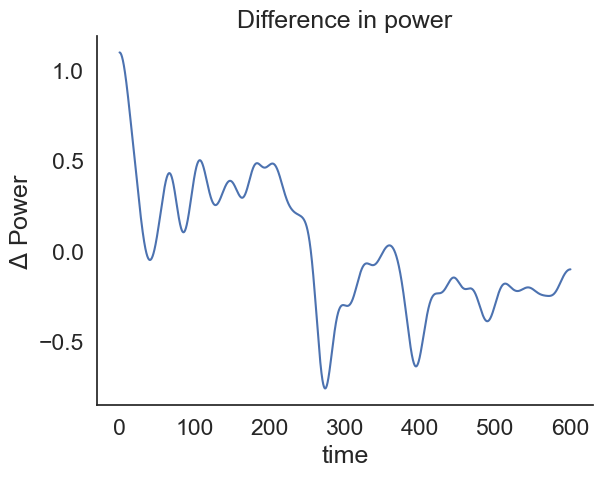

In [35]:
Power_diff =Theta_power-Delta_power
frequencies = np.linspace(0.1,20,200)/sampling_rate
time = np.linspace(0,600,len(Power_diff))
plt.plot(time,Power_diff)
plt.xlabel('time')
plt.ylabel(r'$\Delta$ Power')
plt.title('Difference in power')

### FPB Comments
Time is in seconds here? Good not to hardcode values (like "600" or the indices for the frequency ranges) in your code, that makes it easier to read and to modify

### How does amount of REM vs nREM depend on value of sigma in gaussian filter?

If you take sigma=10000, you see that there is a change between the REM state and nREM state only a few times, such that you get only 4 time lengths for each state, which are pretty long. 

If we decrease the value of sigma to sigma=1000 the time period one of the states hold is decreasing, such that REM and nREM states are alternating more. The fraction REM/nREM stays roughly the same. 

If the value of sigma is decreased even more the REM and nREM states are alternating even more, while the fraction REM/nREM stays rougly the same. 

So by increasing sigma, the signals contain less noise such that the power different is less noisy. As a result that REM and nREM states hold for a longer time period. The original lfp signal however stays the same, sinds this is RAW data. So therefore it is hard to say at what time period the mouse is really in REM sleep and nREM sleep. 

### FPB Comments
Great that you applied smoothing here 

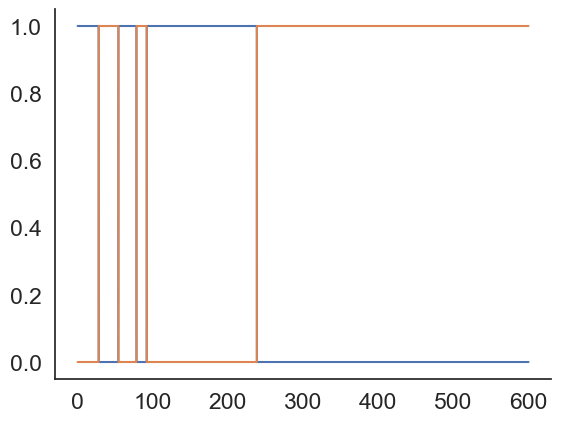

In [ ]:
Delta_power_10000 = gaussian_filter(stats.zscore(np.mean(Power[19:40],axis=0)),sigma=10000)
Theta_power_10000 = gaussian_filter(stats.zscore(np.mean(Power[59:100],axis=0)), sigma=10000)
Power_diff_10000 =Theta_power_10000-Delta_power_10000
REM_10000 = np.zeros(len(Power_diff_10000))
nREM_10000 = np.zeros(len(Power_diff_10000))

for i in range(0,len(Power_diff_10000)): #over elk punt in tijd
    if Power_diff_10000[i]<0.2:
        nREM_10000[i] = 1
        REM_10000[i] = 0
    if Power_diff_10000[i]>0.2:
        nREM_10000[i] = 0
        REM_10000[i] = 1
plt.plot(time, REM_10000)
plt.plot(time,nREM_10000)

In [37]:
# fraction of time in REM and nREM sleep
t_REM_10000 = np.sum(REM_10000)/len(REM_10000)
t_nREM_10000 = np.sum(nREM_10000)/len(nREM_10000)

print(t_REM_10000/t_nREM_10000)

0.4945746511564199


In [38]:
# calculate time lengths one of the two states holds (REM/nREM)
REM_list_10000 = []
nREM_list_10000 = []
length_REM = 0
length_nREM = 0
for i in range(len(REM_10000)):
    if REM_10000[i] == 1:
        length_REM += 1
    else:
        if length_REM !=0:
            REM_list_10000.append(length_REM*0.001) #save total time length of REM sleep
            length_REM = 0 
if length_REM !=0:
    REM_list_10000.append(length_REM*0.001)
        
for i in range(len(nREM_10000)):
    if nREM_10000[i] == 1:
        length_nREM += 1
    else:
        if length_nREM !=0:
            nREM_list_10000.append(length_nREM*0.001)
            length_nREM = 0
if length_nREM !=0:
    nREM_list_10000.append(length_nREM*0.001)

REM_tavg_10000 = np.mean(np.array(REM_list_10000))
nREM_tavg_10000 = np.mean(np.array(nREM_list_10000))

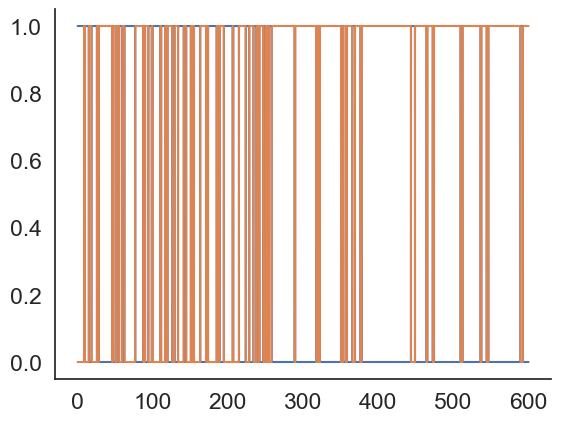

In [39]:
#decrease value of sigma
Delta_power_1000 = gaussian_filter(stats.zscore(np.mean(Power[19:40],axis=0)),sigma=1000)
Theta_power_1000 = gaussian_filter(stats.zscore(np.mean(Power[59:100],axis=0)), sigma=1000)
Power_diff_1000 =Theta_power_1000-Delta_power_1000
REM_1000 = np.zeros(len(Power_diff_1000))
nREM_1000 = np.zeros(len(Power_diff_1000))

for i in range(0,len(Power_diff_1000)): #over elk punt in tijd
    if Power_diff_1000[i]<0.2:
        nREM_1000[i] = 1
        REM_1000[i] = 0
    if Power_diff_1000[i]>0.2:
        nREM_1000[i] = 0
        REM_1000[i] = 1
plt.plot(time, REM_1000)
plt.plot(time,nREM_1000)

In [40]:
# fraction of time in REM and nREM sleep
t_REM_1000 = np.sum(REM_1000)/len(REM_1000)
t_nREM_1000 = np.sum(nREM_1000)/len(nREM_1000)

print(t_REM_1000/t_nREM_1000)

0.429878796976


In [41]:
# calculate time lengths one of the two states holds (REM/nREM)
REM_list_1000 = []
nREM_list_1000 = []
length_REM = 0
length_nREM = 0
for i in range(len(REM_1000)):
    if REM_1000[i] == 1:
        length_REM += 1
    else:
        if length_REM !=0:
            REM_list_1000.append(length_REM*0.001) #save total time length of REM sleep
            length_REM = 0 
if length_REM !=0:
    REM_list_1000.append(length_REM*0.001)
        
for i in range(len(nREM_1000)):
    if nREM_1000[i] == 1:
        length_nREM += 1
    else:
        if length_nREM !=0:
            nREM_list_1000.append(length_nREM*0.001)
            length_nREM = 0
if length_nREM !=0:
    nREM_list_1000.append(length_nREM*0.001)

REM_tavg_1000 = np.mean(np.array(REM_list_1000))
nREM_tavg_1000 = np.mean(np.array(nREM_list_1000))

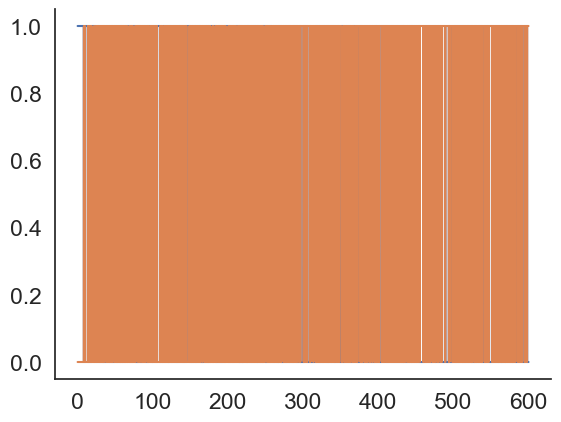

In [42]:
#decrease value of sigma again
Delta_power_100 = gaussian_filter(stats.zscore(np.mean(Power[19:40],axis=0)),sigma=100)
Theta_power_100 = gaussian_filter(stats.zscore(np.mean(Power[59:100],axis=0)), sigma=100)
Power_diff_100 =Theta_power_100-Delta_power_100
REM_100 = np.zeros(len(Power_diff_100))
nREM_100 = np.zeros(len(Power_diff_100))

for i in range(0,len(Power_diff_100)): #over elk punt in tijd
    if Power_diff_100[i]<0.2:
        nREM_100[i] = 1
        REM_100[i] = 0
    if Power_diff_100[i]>0.2:
        nREM_100[i] = 0
        REM_100[i] = 1
plt.plot(time, REM_100)
plt.plot(time,nREM_100)

In [43]:
# fraction of time in REM and nREM sleep
t_REM_100 = np.sum(REM_100)/len(REM_100)
t_nREM_100 = np.sum(nREM_100)/len(nREM_100)

print(t_REM_100/t_nREM_100)

0.6088192007549051


In [44]:
REM_list_100 = []
nREM_list_100 = []
length_REM = 0
length_nREM = 0
for i in range(len(REM_100)):
    if REM_100[i] == 1:
        length_REM += 1
    else:
        if length_REM !=0:
            REM_list_100.append(length_REM*0.001) #save total time length of REM sleep
            length_REM = 0 
if length_REM !=0:
    REM_list_100.append(length_REM*0.001)
        
for i in range(len(nREM_100)):
    if nREM_100[i] == 1:
        length_nREM += 1
    else:
        if length_nREM !=0:
            nREM_list_100.append(length_nREM*0.001)
            length_nREM = 0
if length_nREM !=0:
    nREM_list_100.append(length_nREM*0.001)

REM_tavg_100 = np.mean(np.array(REM_list_100))
nREM_tavg_100 = np.mean(np.array(nREM_list_100))

[]

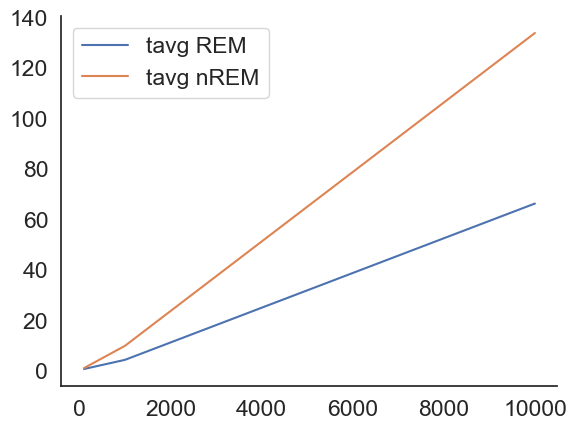

In [45]:
#plot difference in time average
sigma = [100,1000,10000]
tavg_REM = [REM_tavg_100, REM_tavg_1000, REM_tavg_10000]
tavg_nREM = [nREM_tavg_100, nREM_tavg_1000, nREM_tavg_10000]

plt.plot(sigma,tavg_REM, label='tavg REM')
plt.plot(sigma,tavg_nREM, label='tavg nREM')
plt.legend()
plt.plot()

Text(0.5, 1.0, 'nREM sleep')

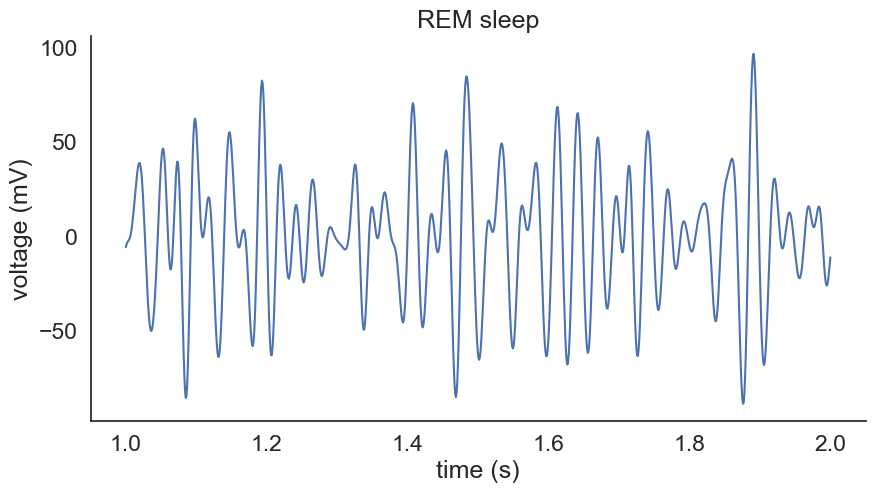

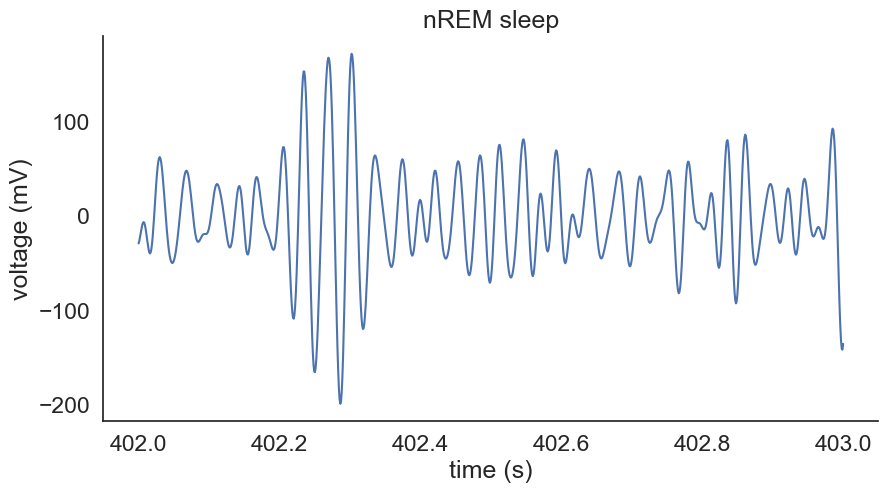

In [ ]:
lfp_filter = lf.bandpass_filter(lfp,low_f=20,high_f=45, sampling_rate=sampling_rate)

plt.figure(figsize=(10,5))
plt.plot(np.linspace(1,2,1000),lfp_filter[1000:2000])
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('REM sleep')

plt.figure(figsize=(10,5))
plt.plot(np.linspace(402,403,1000),lfp_filter[402000:403000])
plt.xlabel('time (s)')
plt.ylabel('voltage (mV)')
plt.title('nREM sleep')

### FPB Comments
it would be nice to see longer stretches of REM, NREM sleep, as the main different is in theta oscillations (8 Hz). But the code is good. Grade: 9